In [1]:
!pip install torch

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [20]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

print(training_data)

print(test_data)

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [3]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


In [4]:
# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cuda device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [12]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [13]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [14]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [15]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 1.187821  [   64/60000]
loss: 0.543988  [ 6464/60000]
loss: 0.385463  [12864/60000]
loss: 0.498114  [19264/60000]
loss: 0.505283  [25664/60000]
loss: 0.428322  [32064/60000]
loss: 0.353995  [38464/60000]
loss: 0.530184  [44864/60000]
loss: 0.453181  [51264/60000]
loss: 0.519919  [57664/60000]
Test Error: 
 Accuracy: 83.9%, Avg loss: 0.432840 

Epoch 2
-------------------------------
loss: 0.265478  [   64/60000]
loss: 0.354244  [ 6464/60000]
loss: 0.287538  [12864/60000]
loss: 0.364064  [19264/60000]
loss: 0.447138  [25664/60000]
loss: 0.414756  [32064/60000]
loss: 0.302437  [38464/60000]
loss: 0.482775  [44864/60000]
loss: 0.390521  [51264/60000]
loss: 0.475333  [57664/60000]
Test Error: 
 Accuracy: 85.2%, Avg loss: 0.401133 

Epoch 3
-------------------------------
loss: 0.249689  [   64/60000]
loss: 0.333578  [ 6464/60000]
loss: 0.246627  [12864/60000]
loss: 0.337603  [19264/60000]
loss: 0.389063  [25664/60000]
loss: 0.342461  [32064/600

In [16]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


In [17]:
model = NeuralNetwork().to(device)
model.load_state_dict(torch.load("model.pth", weights_only=True))

<All keys matched successfully>

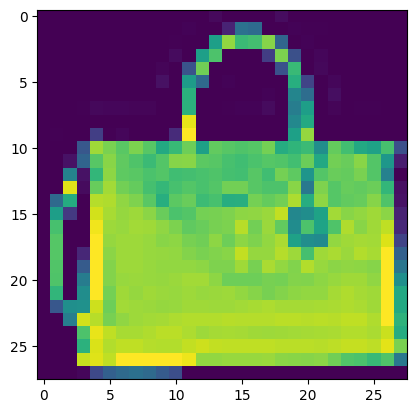

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Load a test image
grab_img = test_data[30]

# Load just the image without id
test_img = grab_img[0].reshape(28,28)

# Display image
plt.imshow(test_img)


We are testing #9500 out of 10000 from the FashionMNIST dataset:
Predicted: "Bag", Actual: "Bag"


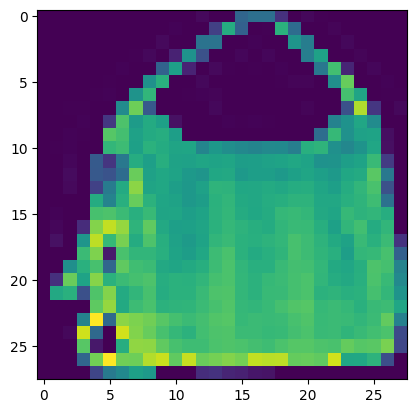

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

test_num = 9500

model.eval()
x, y = test_data[test_num][0], test_data[test_num][1]

# Display image
print(f'We are testing #{test_num} out of 10000 from the FashionMNIST dataset:')
plt.imshow(x.reshape(28,28))

with torch.no_grad():
    x = x.to(device)
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')